<a href="https://colab.research.google.com/github/codegithubka/Physics-4AL-Gooogle-Collab-Files/blob/main/Lab_2A_in_lab_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example

In this lab, we will be collecting data, but due to various factors, we will have some extraneous measurements before and after that we'll need to cut out

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

# numpy has a function that helps to read data files so we import it
import numpy as np

# Read in data using np.loadtxt. It takes in two inputs, the path to the file and a delimiter. The delimiter in this case is ',' since it is a csv file.
# We used skiprows = 1 to skip the first row of the csv file which contained the column headers and the units. 
# Your data will have two columns - elapsed time and ultrasound distance
read_in_array = np.loadtxt('/content/drive/My Drive/acceleration_data.csv',skiprows=1,delimiter=',')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


Below we separate out the data. For this example, we will not be doing any conversions, but for your reports, you will need to convert these numbers into real units


In [ ]:
# This dataset has two columns
# Take all of the elements in the 0th column to create your x-axis array
time = read_in_array[:,0]

# We create an array to store the positions

position = read_in_array[:,1]


Let's look at the raw data.

Text(0, 0.5, 'Position (arbitrary units)')

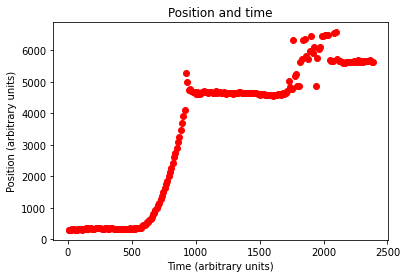

In [ ]:
# Import the module that will help you create a scatter plot
import matplotlib.pyplot as plt

# Make the scatter plot
plt.scatter(time,position,color="red")

# Provide a title to the plot
plt.title('Position and time')

# Label the x axis
plt.xlabel('Time (arbitrary units)')

# Label the y axis
plt.ylabel('Position (arbitrary units)')

There is some obvious noise in the beginning before the object is dropped and some noise after. 

The limits of the plot prevent us from doing any analysis, so we will index the array, selecting only the first 1000 elements with `array[beginning index:ending index]`. Below, we plot which positions we want to section out.

Text(0, 0.5, 'Position(arbitrary units)')

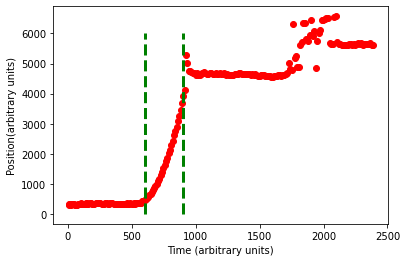

In [ ]:
# Create a scatter plot
plt.scatter(time,position,color="red")


# Plot a vertical line where this intersects with our acceleration
plt.vlines([600,900], 0, 6000, color = 'green', linewidth = 3, linestyle = '--')

# Label the x axis
plt.xlabel('Time (arbitrary units)')

# Label the y axis
plt.ylabel('Position(arbitrary units)')

The x axis is in time units, not in index so in order to figure out what indices to put into `array[beginning index:ending index]`, let's plot it vs index number. We do this by only putting the position as the argument for a plt.plot function

Text(0, 0.5, 'Position')

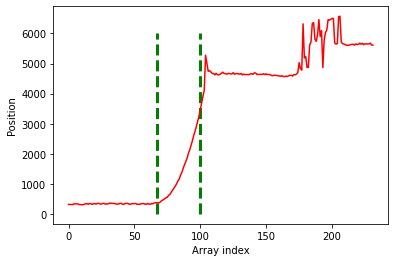

In [ ]:
# Create a scatter plot with only one argument
plt.plot(position,color="red")

# Plot a vertical line where this intersects with our acceleration
plt.vlines([67,100], 0, 6000, color = 'green', linewidth = 3, linestyle = '--')

# Label the x axis
plt.xlabel('Array index')

# Label the y axis
plt.ylabel('Position')

We now see that the x axis gives the index position and we can look at where our desired portion is. Indicated above is the portion of the data when the object is falling, beginning from an array index of 67 and ending at an array index of 100. We can therefore cut out the relevant dataset with:

```
position_window = position[67:100]
time_window = time[67:100]
```

Note that we have to also index the time array. Plotting the windows below, we see that we have our desired portion of the data

Text(0, 0.5, 'Position (arbitrary units)')

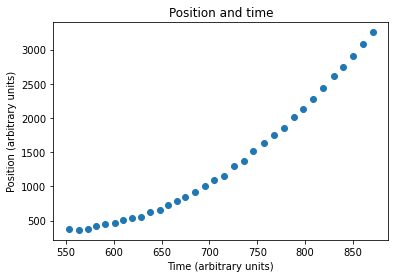

In [ ]:
position_window = position[67:100]
time_window = time[67:100]

plt.scatter(time_window, position_window)


# Provide a title to the plot
plt.title('Position and time')

# Label the x axis
plt.xlabel('Time (arbitrary units)')

# Label the y axis
plt.ylabel('Position (arbitrary units)')

One more thing that we'll want to do is to start our data at time = 0 rather than time = 550. We can do this by subtracting the first element



```
time_window = time_window - time_window[0]
```

Text(0, 0.5, 'Position (arbitrary units)')

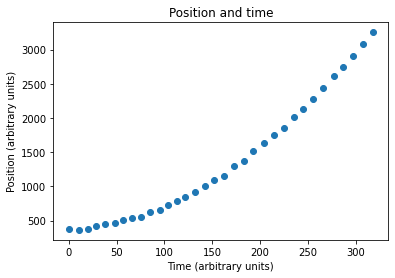

In [ ]:
time_window = time_window - time_window[0]

plt.scatter(time_window, position_window)


# Provide a title to the plot
plt.title('Position and time')

# Label the x axis
plt.xlabel('Time (arbitrary units)')

# Label the y axis
plt.ylabel('Position (arbitrary units)')

# Work with your own data now

Mount your Google drive.


In [8]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


The next step is to import the modules and read the file.

In [10]:
# numpy has a function that helps to read data files so we import it
import numpy as np
import matplotlib.pyplot as plt
# Read in data using np.loadtxt. It takes in two inputs, the path to the file and a delimiter. The delimiter in this case is ';' since it is a csv file.
# Your path should be something like "/content/drive/My Drive/data.csv" 
read_in_array = np.loadtxt('/content/drive/MyDrive/3deg.csv',delimiter=';')

This dataset has two columns and multiple rows. You have already seen how to create 1-D arrays from 2-D arrays. 

In [3]:
# This dataset has two columns
# The zeroth column is the x axis, and the first column is y axis
# Take all of the elements in the 0th column to create your x-axis array
time_millis = read_in_array[:,0]
# The x_axis data is the elapsed time in milliseconds

# Take all of the elements in the 1st column to create your y-axis array
dist_cm = read_in_array[:,1]
# The y_axis data is the distance in cm.

Convert the time from milliseconds to seconds and convert the distance from cm to m.

In [4]:
#Time from ms to s
time_s = time_millis/1000

#Distance from cm to m
dist_m=dist_cm/100

We can plot the data to observe what's going on. 

Text(0.5, 1.0, 'Time vs Distance')

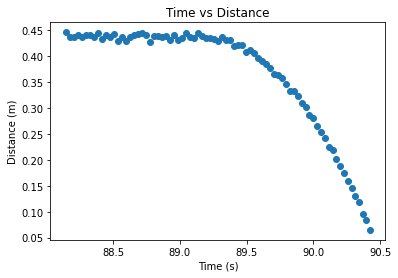

In [12]:
plt.scatter(time_s,dist_m)

# Add axes labels
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.title('Time vs Distance')




We can see that the entire dataset is not exhibiting a quadratic behavior like we expect. We can use our knowledge of arrays to isolate the data that matters to us.

We can do this by plotting the y-axis data vs the array index and observing the start and end point of the quadratic portion of the graph.


Text(0.5, 1.0, 'Array Indices vs Distance')

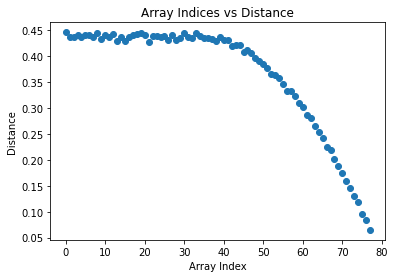

In [13]:
# Create a variable that starts from 0 and ends at the size of the array
array_index=np.arange(0,len(dist_m))

# Plot the distance vs array index
plt.scatter(array_index, dist_m)

# Add axes labels
plt.xlabel('Array Index')
plt.ylabel('Distance')
plt.title('Array Indices vs Distance')





From your plot, determine cutoff indices for where the quadratic portion of the graph starts and ends. Now, below, we will plot the cutoffs to make sure that they make sense. 

The lower time cutoff is 89048.0s
The upper time cutoff is 90424.0s


Text(0.5, 1.0, 'Time vs Distance')

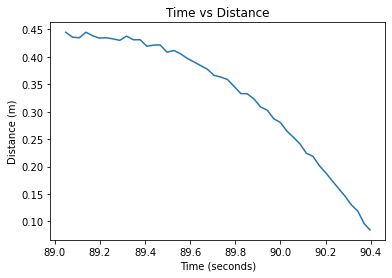

In [14]:
lower_index = 30
lower_time_limit = time_millis[lower_index]
print('The lower time cutoff is ' + str(lower_time_limit) + 's')


upper_index = 77
upper_time_limit = time_millis[upper_index]
print('The upper time cutoff is ' + str(upper_time_limit) + 's')

# Create new arrays for the time window and distance window that we care about
time_window = time_s[lower_index:upper_index]
dist_window = dist_m[lower_index:upper_index]

plt.plot(time_window, dist_window)

# Add axes labels
plt.xlabel('Time (seconds)')
plt.ylabel('Distance (m)')
plt.title('Time vs Distance')



Does the above plot look like a parabola? Adjust the indices until you isolate the portion of the plot that you are happy with.

Text(0.5, 1.0, 'Time vs Distance')

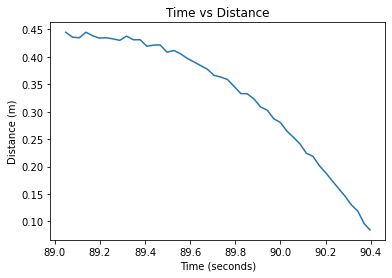

In [15]:
time_window = time_s[lower_index:upper_index]
dist_window = dist_m[lower_index:upper_index]

plt.plot(time_window, dist_window)

# Add axes labels
plt.xlabel('Time (seconds)')
plt.ylabel('Distance (m)')
plt.title('Time vs Distance')

Finally, fit and plot a curve using a polyfit order 2 polynomial. This is mostly coded below. (Find the associated uncertainties)

Text(0.5, 1.0, 'Time vs Distance')

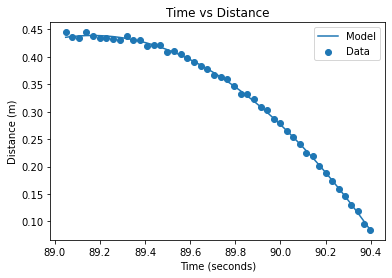

In [16]:
coeff_quad = np.polyfit(time_window, dist_window, 2)
y_fit=coeff_quad[0]*time_window**2+coeff_quad[1]*time_window+coeff_quad[2]

plt.plot(time_window,y_fit, label = 'Model')
plt.scatter(time_window, dist_window, label = 'Data')
plt.legend()

# Your x and y axes labels here
plt.xlabel('Time (seconds)')
plt.ylabel('Distance (m)')

#Title 
plt.title('Time vs Distance')



We can find the associated error in the coefficient of the 2nd degree term with the covariance matrix.

In [19]:
coeff_quad, cov = np.polyfit(time_window, dist_window, 2, cov=True)

# Error in quadratic coefficient
quad_err = np.sqrt(cov[0,0])



We can extract the angle of tilt from the value of coeff_quad[0]

In [17]:
# Angle of tilt

# np.arcsin() finds sin inverse and returns the value in radians
angle_rad = np.arcsin(2*coeff_quad[0]/9.8)

# Convert the angle to degrees
angle_deg = angle_rad*180/np.pi

print(angle_deg)


-2.731109345121729


We can also find the uncertainty in the angle. You can refer to the slides for the derivation.

In [20]:
# Error in angle
a = coeff_quad[0]

# Recall quad_err is the error in "a"
# The formula is taken from the slides of lab 2A
angle_err_rad = (2/9.8)*(quad_err)/(np.sqrt(1-(2*a/9.8)**2))

#Convert to degrees
angle_err_deg = angle_err_rad*180/np.pi

print(angle_err_deg)


0.041059296409970955
